# Stochastic Simulation Assignment 3


### **Contributors**  
- **Maarten Stork**  
- **Paul Jungnickel**  
- **Lucas Keijzer**

### **Overview**  
This notebook contains the code and analysis for **Assignment 3 of Stochastic Simulation**. The code follows the order specified in the assignment guidelines and replicates the experiments conducted in the referenced paper. Each section corresponds to (a) key experiment(s).

In [7]:
from CircleParticleSim import *
import numpy as np
import numpy.random as rand

# 1)

# 2)

In [8]:
# Parameters used
num_particles = 12
steps = 10000
num_runs = 50

schedules = [
# log_cooling_schedule,
# basic_cooling_schedule,
paper_cooling_schedule,
exponential_cooling_schedule,
# linear_cooling_schedule,
# quadratic_cooling_schedule,
sigmoid_cooling_schedule,
inverse_sqrt_cooling_schedule,
cosine_annealing_cooling_schedule,
# stepwise_cooling_schedule,
]

In [9]:
data = {}

# generate data
for schedule in schedules:
    print(schedule.__name__)
    mean_energy, std_energy, mean_temperatures = evaluate_multiple_runs(
        num_particles, cooling_schedule=schedule, steps=steps, num_runs=num_runs
    )
    data[schedule.__name__] = {
        "mean_energy": mean_energy,
        "std_energy": std_energy,
        "mean_temperatures": mean_temperatures
    }

# Save data
np.save('data/data-2-{}-{}.npy'.format(num_particles, len(schedules)), data)


paper_cooling_schedule
exponential_cooling_schedule
sigmoid_cooling_schedule


c:\Users\Lucas\OneDrive - UvA\Documenten\Computational Science\Stochastic simulation\Stochastic_Simulation_Assignment_3\CircleParticleSim.py:358: RuntimeWarning: overflow encountered in scalar divide
  acceptance = min(1, np.exp(-dE / self.T))
c:\Users\Lucas\OneDrive - UvA\Documenten\Computational Science\Stochastic simulation\Stochastic_Simulation_Assignment_3\CircleParticleSim.py:358: RuntimeWarning: divide by zero encountered in scalar divide
  acceptance = min(1, np.exp(-dE / self.T))
c:\Users\Lucas\OneDrive - UvA\Documenten\Computational Science\Stochastic simulation\Stochastic_Simulation_Assignment_3\CircleParticleSim.py:358: RuntimeWarning: invalid value encountered in scalar divide
  acceptance = min(1, np.exp(-dE / self.T))


inverse_sqrt_cooling_schedule
cosine_annealing_cooling_schedule


C:\Users\Lucas\AppData\Local\Temp/ipykernel_21372/3606978665.py:36: UserWarning: Attempt to set non-positive xlim on a log-scaled axis will be ignored.
  plt.xlim(left=skip_first_steps)


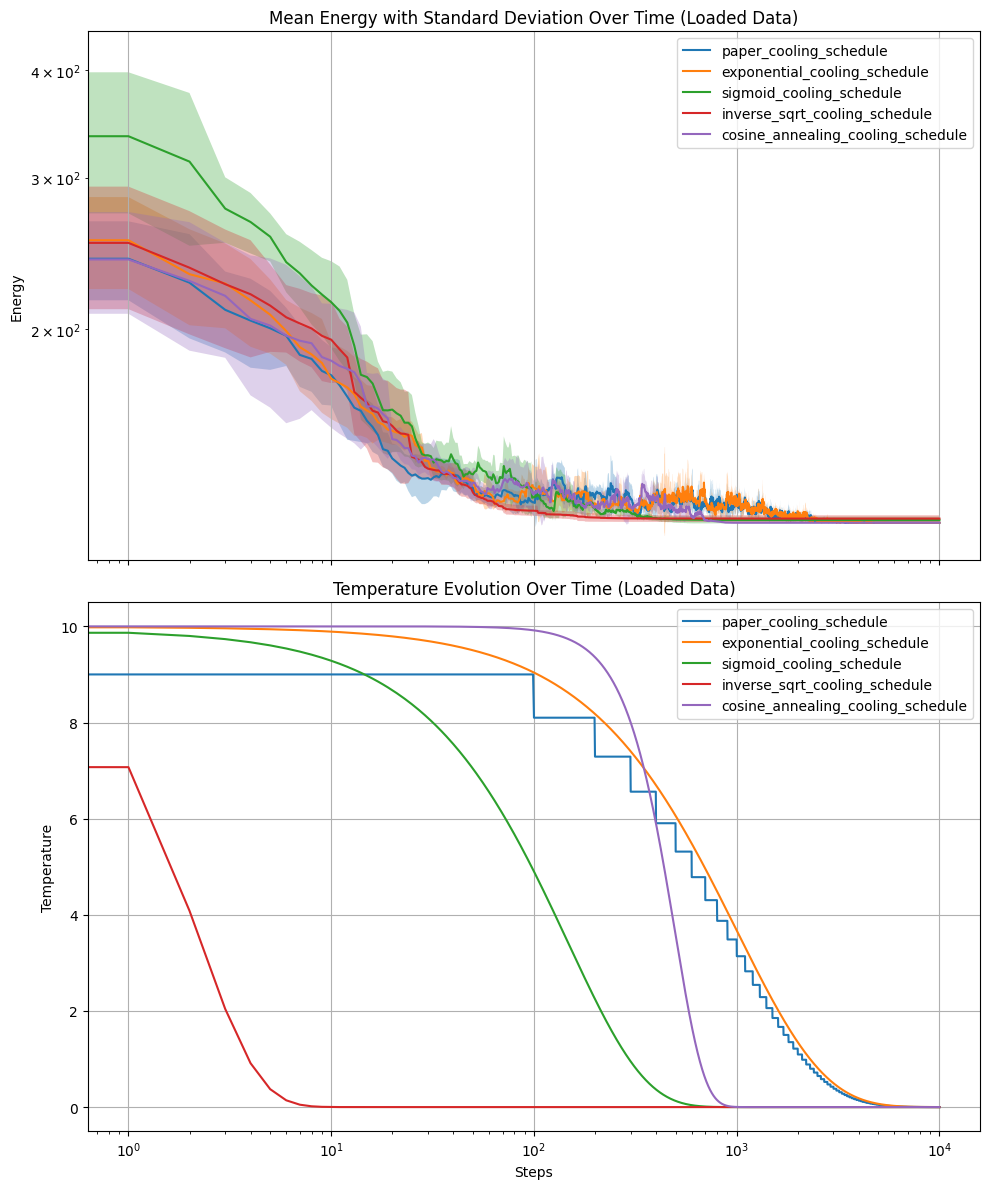

In [13]:
loaded_data = np.load('data/data-2-{}-{}.npy'.format(num_particles, len(schedules)), allow_pickle=True).item()

fig, axs = plt.subplots(2, 1, figsize=(10, 12), sharex=True)

for schedule_name, results in loaded_data.items():
    mean_energy = results["mean_energy"]
    std_energy = results["std_energy"]
    mean_temperatures = results["mean_temperatures"]

    axs[0].plot(mean_energy, label=schedule_name)
    axs[0].fill_between(
        range(len(mean_energy)),
        mean_energy - std_energy,
        mean_energy + std_energy,
        alpha=0.3
    )
    axs[1].plot(mean_temperatures, label=schedule_name)

# Plot for energy
axs[0].set_ylabel("Energy")
axs[0].set_title("Mean Energy with Standard Deviation Over Time (Loaded Data)")
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].legend()
axs[0].grid(True)

# Plot for temperature
axs[1].set_xlabel("Steps")
axs[1].set_ylabel("Temperature")
axs[1].set_title("Temperature Evolution Over Time (Loaded Data)")
axs[1].set_xscale('log')
axs[1].legend()
axs[1].grid(True)

skip_first_steps = 0
plt.xlim(left=skip_first_steps)
plt.tight_layout()
plt.show()

# 3)

In [ ]:
rand.seed(42)
run_count = 100
num_scales = 50
num_particles = 50
scales = np.logspace(-2,1,num=num_scales, base=10)
print(scales)
arrs = np.zeros([num_scales, run_count]) 

for i, scale in enumerate(scales):
    num_steps = int(100000 * scale)
    for j in range(run_count):
        sim  = CircleParticleSim(num_particles, steps=num_steps, seed=rand.randint(0,2**31-1),
                    cooling_schedule = paper_cooling_schedule,
                    step_size_schedule = sqrt_step_size_schedule,
                    random_step_likelihood=0.2,
                    extra_args = {'cooling_schedule_scaling' : scale} 
                    )
        sim.run_simulation(num_steps)
        arrs[i,j] = sim.E

    print('.', end='')

    
np.save('data/data-3-{}-{}.npy'.format(num_particles, num_scales), arrs)

In [ ]:

arrs = np.load('data/data-3-50-50.npy')
arrs = arrs[:]
scales = np.logspace(-2,1,num=num_scales, base=10)
scales1 = 100*scales[:]
print(arrs.shape)
mean = np.mean(arrs, axis=1)
min_energy = np.min(arrs)
plt.plot(scales1, mean, label='mean energy + IQR')
# plt.plot(probs, np.percentile(arrs, 5, axis=1))
plt.fill_between(scales1, np.percentile(arrs, 0, axis=1), np.percentile(arrs, 99, axis=1), alpha=0.3)
plt.plot(scales1, min_energy*np.ones_like(scales1), linestyle = ':', color='gray', label='lowest measured energy')
plt.xlabel('chain length scaling')
plt.ylabel('E')
plt.xscale('log')
plt.ylim([2900, 2950])
plt.legend()

# 4)

In [ ]:
rand.seed(42)
run_count = 100
num_probs = 50
num_particles = 16
probs = np.linspace(0,1,num_probs)
arrs = np.zeros([num_probs, run_count]) 

for i, p in enumerate(probs):
    for j in range(run_count):
        sim  = CircleParticleSim(num_particles, steps=100000, seed=rand.randint(0,2**31-1),
                    cooling_schedule = paper_cooling_schedule,
                    step_size_schedule = sqrt_step_size_schedule,
                    random_step_likelihood=p
                    )
        sim.run_simulation(10000)
        arrs[i,j] = sim.E

    print('.', end='')

    
np.save('data/data-4-{}-{}.npy'.format(num_particles, num_probs), arrs)





(48, 100)


ValueError: x and y must have same first dimension, but have shapes (18,) and (48,)

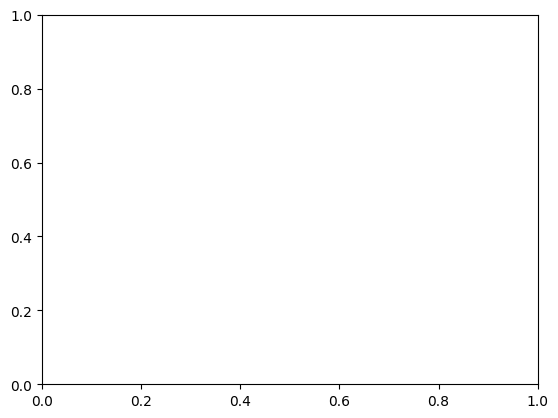

In [6]:

arrs = np.load('data/data-4-50-50.npy')
arrs = arrs[2:]
num_probs = 20
probs = np.linspace(0,1,num_probs)
probs1 = probs[2:]
print(arrs.shape)
mean = np.mean(arrs, axis=1)
min_energy = np.min(arrs)
plt.plot(probs1, mean, label='mean energy + IQR')
# plt.plot(probs, np.percentile(arrs, 5, axis=1))
plt.fill_between(probs1, np.percentile(arrs, 0, axis=1), np.percentile(arrs, 99, axis=1), alpha=0.3)
plt.plot(probs1, min_energy*np.ones_like(probs1), linestyle = ':', color='gray', label='lowest measured energy')
plt.xlabel('P(random step)')
plt.ylabel('E')
plt.legend()